## Bilgi Mühendisliği Alternatör Devri Analysis

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df_yuklu = pd.read_excel('excelData.xlsx', sheet_name='yuklu')
df_yuksuz = pd.read_excel('excelData.xlsx', sheet_name='yuksuz')
df_aku = pd.read_excel('excelData.xlsx', sheet_name='akuSarj')

#### Temel İstatislikler (her bir parametre için değerlerin hesaplanması)

In [59]:
print("\nYüklü Durum Temel İstatistikleri:")
df_yuklu.describe()



Yüklü Durum Temel İstatistikleri:


,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
count,901.000000,901.000000,9.010000e+02,901.000000,901.000000,9.010000e+02,901.000000
mean,61.042788,13.546744,1.561628e+01,4075.235094,6.977928,1.073777e+01,13.709923
std,18.245639,0.967267,1.324151e+01,53.185372,0.949659,8.006403e+00,1.041208
min,24.039899,10.736694,0.000000e+00,3692.962646,5.288342,0.000000e+00,10.833435
25%,51.189505,13.732605,2.105713e-07,4047.821045,6.156873,2.593994e-15,13.907776
50%,65.595135,13.875122,1.661682e+01,4068.695068,6.998547,1.301880e+01,14.015198
75%,72.510837,14.014587,2.380371e+01,4108.703613,7.808789,1.829834e+01,14.273071
max,90.961029,14.374695,4.257202e+01,4225.250244,8.628186,2.222290e+01,14.627991


In [60]:
print("\nYüksüz Durum Temel İstatistikleri:")
df_yuksuz.describe()


Yüksüz Durum Temel İstatistikleri:


,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
count,901.000000,9.010000e+02,9.010000e+02,895.000000,9.010000e+02,901.0,9.010000e+02
mean,40.127624,1.259981e+01,1.589437e+00,2560.065840,7.017949e+00,0.0,1.259981e+01
std,2.981082,1.066406e-14,5.092507e+00,2219.638319,9.435191e-01,0.0,1.066406e-14
min,30.922311,1.259981e+01,0.000000e+00,0.000000,6.300000e-11,0.0,1.259981e+01
25%,38.803381,1.259981e+01,0.000000e+00,0.000000,6.258801e+00,0.0,1.259981e+01
50%,41.508078,1.259981e+01,0.000000e+00,4049.560547,7.025403e+00,0.0,1.259981e+01
75%,41.949152,1.259981e+01,3.387451e-14,4120.010376,7.792004e+00,0.0,1.259981e+01
max,49.708163,1.259981e+01,3.591919e+01,9567.260742,8.608044e+00,0.0,1.259981e+01


In [61]:
print("\nAkü Şarj Durumu Temel İstatistikleri:")
df_aku.describe()


Akü Şarj Durumu Temel İstatistikleri:


,Sıcaklık,Alternatör Gerilimi,Alternatör Akımı,Alternatör Devri,Yakıt Tüketimi,Yük Akımı,Yük Gerilimi
count,901.000000,901.000000,901.000000,901.000000,901.000000,9.010000e+02,901.000000
mean,50.507690,13.926586,0.251401,2964.910611,6.855492,6.125532e-15,14.042570
std,4.048817,0.146382,0.252115,1998.245369,0.914187,1.441081e-14,0.130387
min,30.575555,13.158264,0.100220,0.000000,5.288953,0.000000e+00,13.632507
25%,50.201944,13.830566,0.127701,1130.676270,6.065015,0.000000e+00,13.965454
50%,51.694382,13.949280,0.148666,4059.997559,6.852673,0.000000e+00,14.059143
75%,52.484985,14.038086,0.177612,4111.312866,7.640332,7.629395e-15,14.141846
max,64.310751,14.468079,0.999603,9802.093506,8.482617,1.602173e-13,14.353027


### Korelasyon Analizi

Yüklü için korelasyon analizi


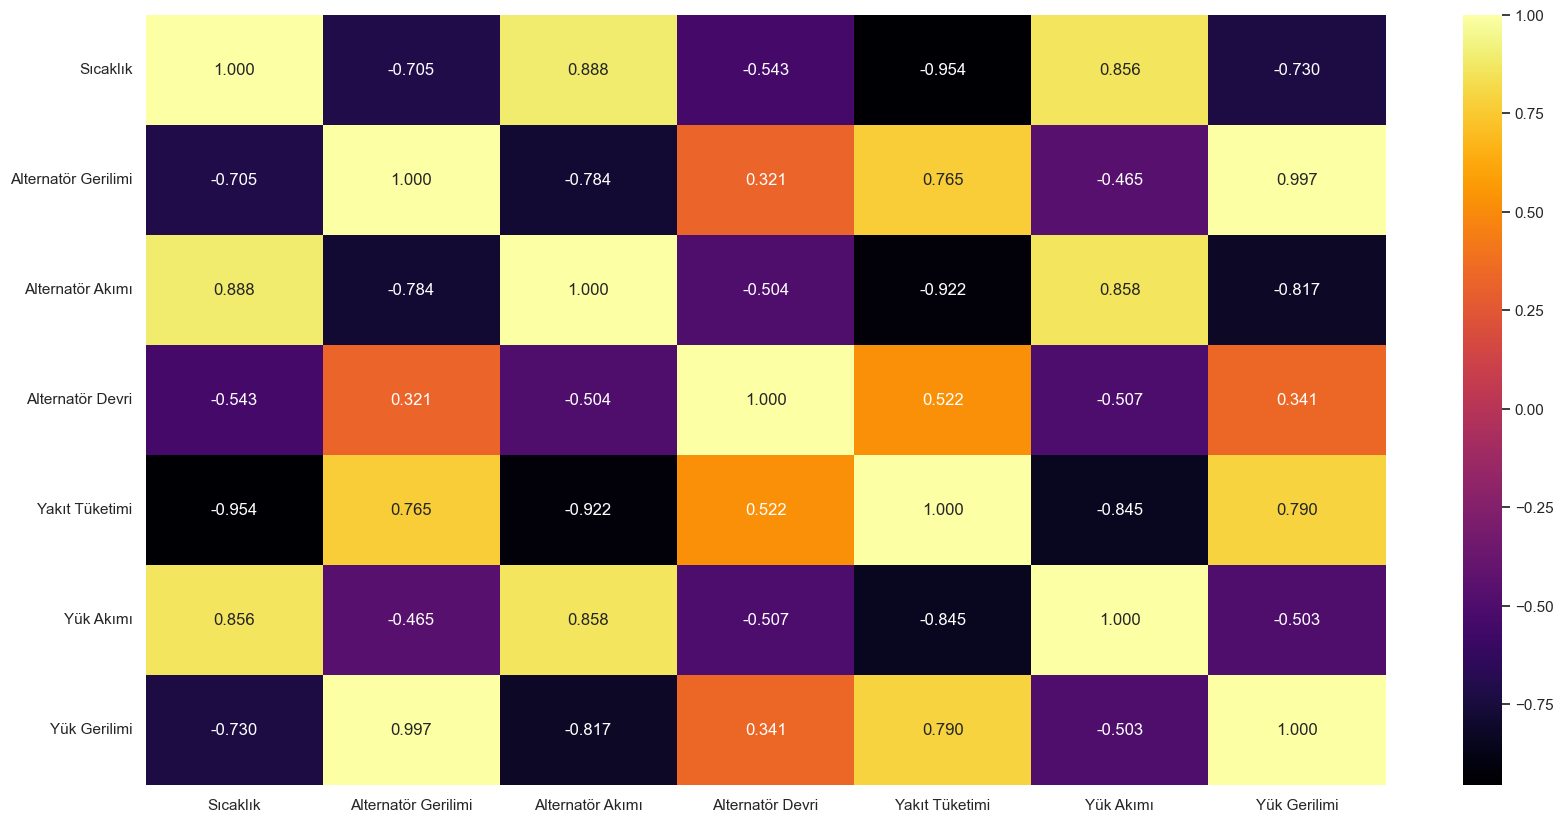

In [62]:
print("Yüklü için korelasyon analizi")
plt.figure(figsize=(20,10))
sns.heatmap(df_yuklu.corr(), annot=True, cmap='inferno', fmt='.3f')
plt.show()

Yüksüz için korelasyon analizi


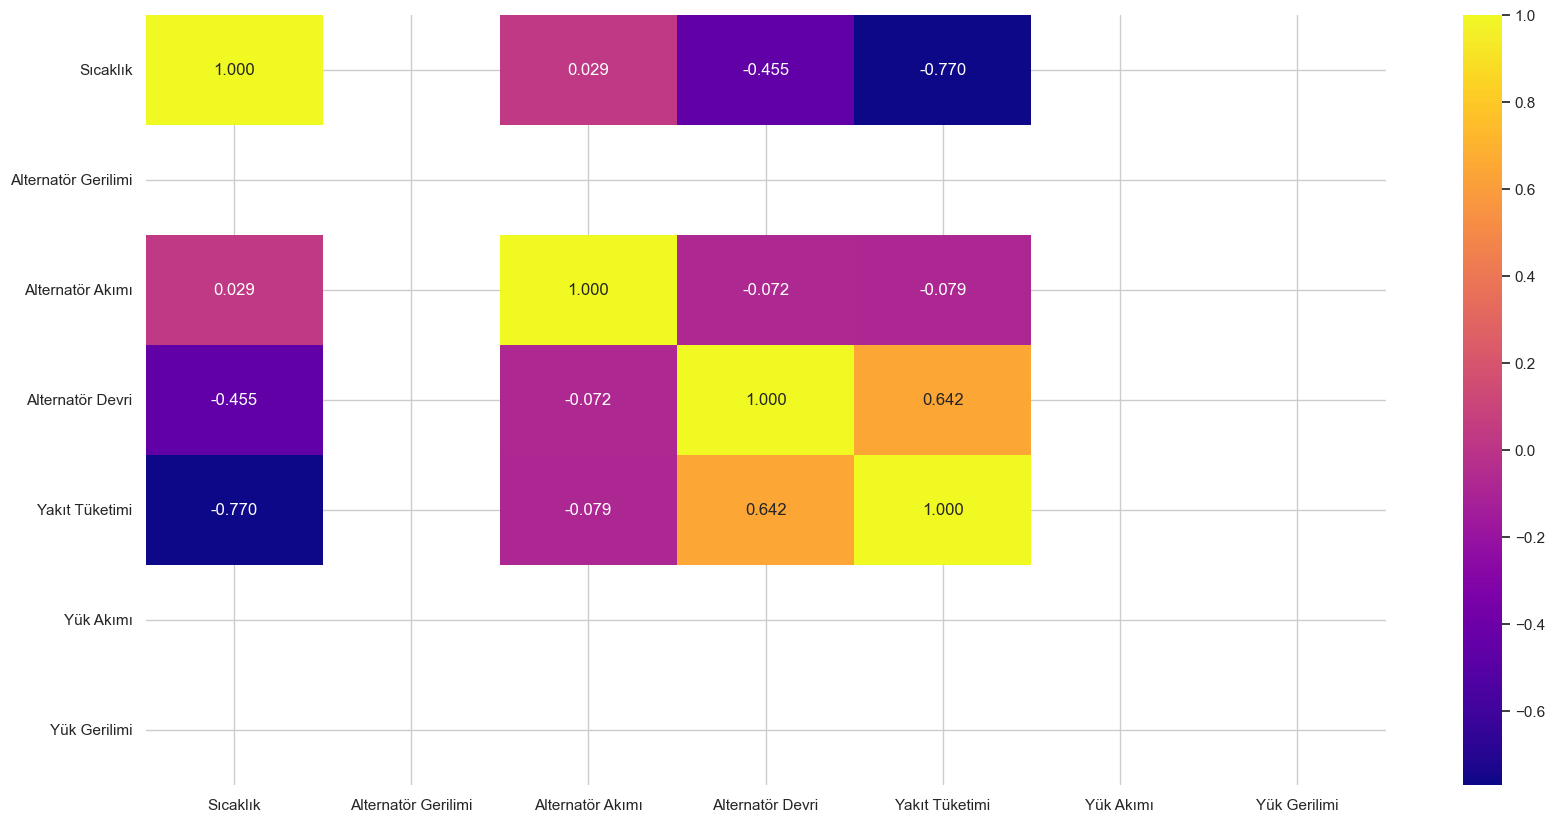

In [63]:
print("Yüksüz için korelasyon analizi")
plt.figure(figsize=(20,10))
sns.heatmap(df_yuksuz.corr(), annot=True, cmap='plasma', fmt='.3f')
plt.show()

Akü için korelasyon analizi


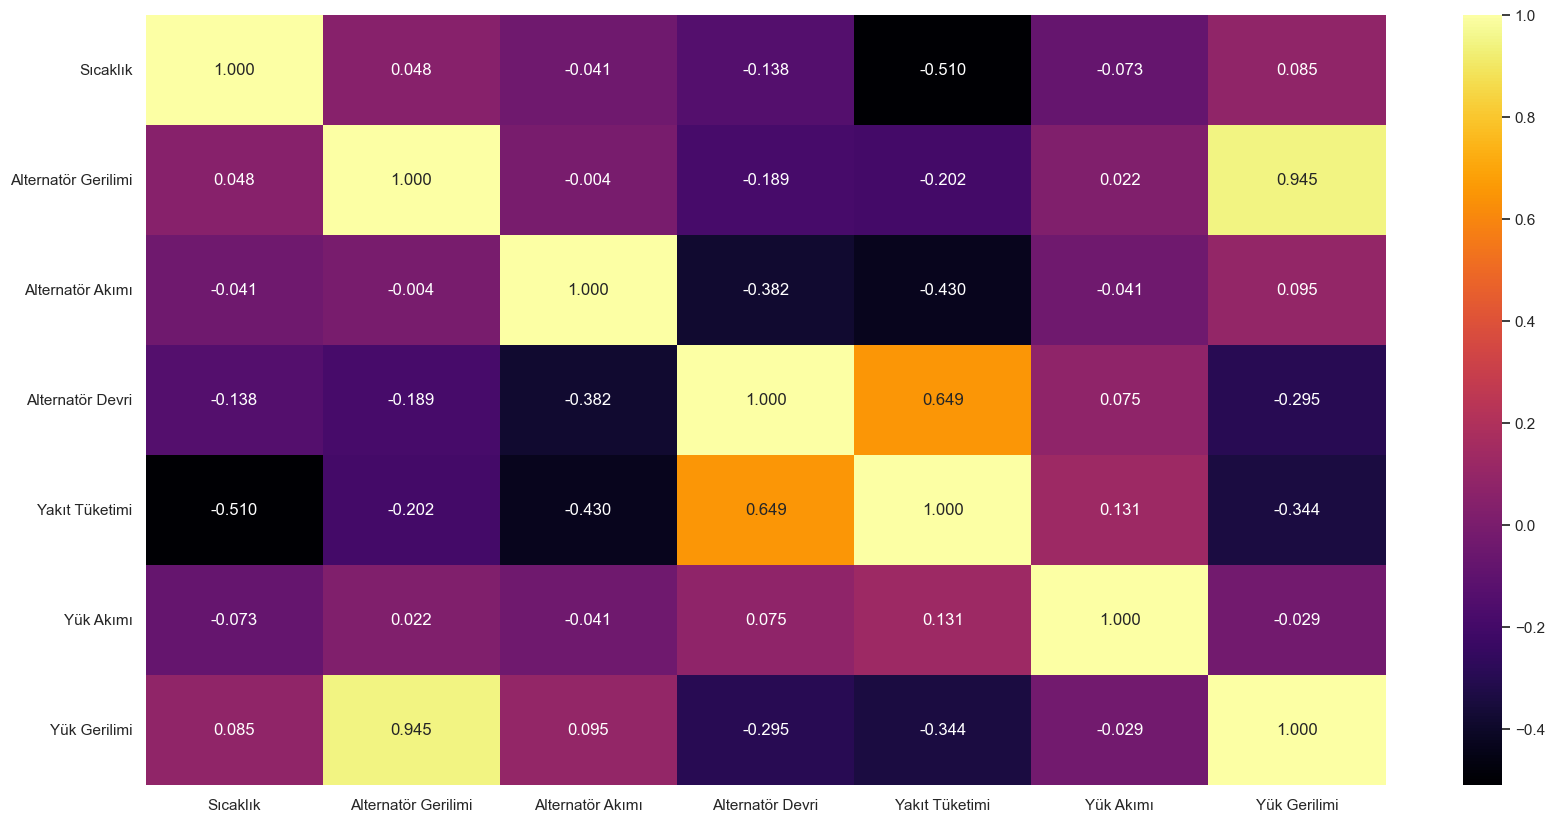

In [64]:
print("Akü için korelasyon analizi")
plt.figure(figsize=(20,10))
sns.heatmap(df_aku.corr(), annot=True, cmap='inferno', fmt='.3f')
plt.show()

### Karşılaştırmalı Analiz

In [65]:
consistent_columns = ['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Akımı', 
                      'Alternatör Devir', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']

df_yuklu.columns = consistent_columns
df_yuksuz.columns = consistent_columns
df_aku.columns = consistent_columns

df_yuklu['Condition'] = 'Yuklu'
df_yuksuz['Condition'] = 'Yuksuz'
df_aku['Condition'] = 'Aku'

In [66]:
df_combined = pd.concat([df_yuklu, df_yuksuz, df_aku], ignore_index=True)

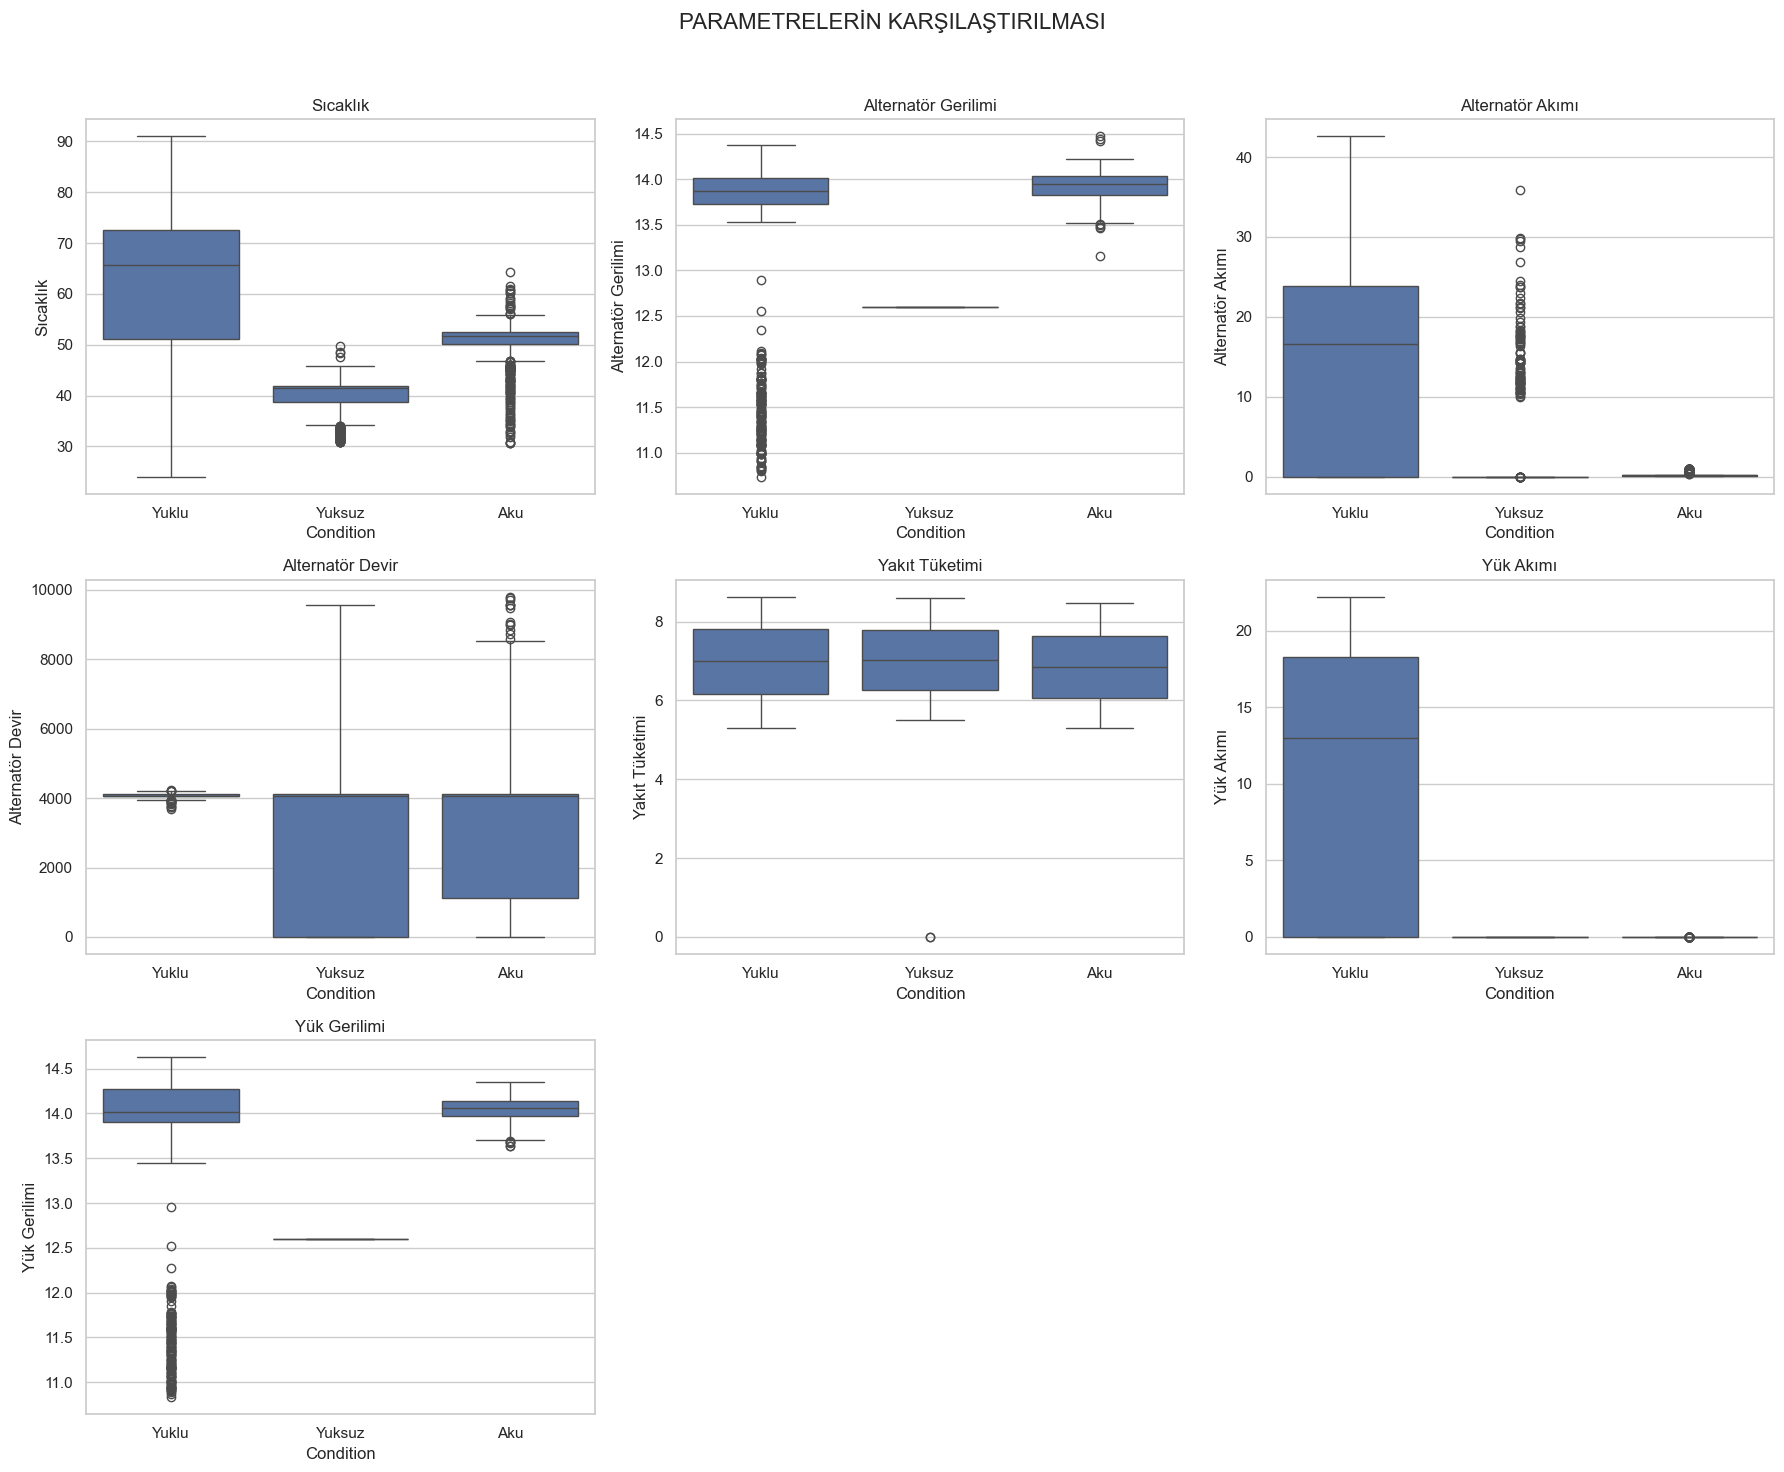

In [67]:
columns_to_plot = ['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Akımı', 'Alternatör Devir', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']



fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('PARAMETRELERİN KARŞILAŞTIRILMASI', fontsize=16)

axes = axes.flatten()


for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df_combined, x='Condition', y=column, ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Condition')
    axes[i].set_ylabel(column)

for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

### Anova Testi ve Hipotez Testi

In [68]:
from scipy import stats

In [69]:
anova_results = []

for column in columns_to_plot:
    f_deger, p_deger = stats.f_oneway(
        df_yuklu[column].dropna(),
        df_yuksuz[column].dropna(),
        df_aku[column].dropna()
    )
    
    anova_results.append({'Parametre': column, 'F Değeri': f_deger, 'p Değeri': p_deger})

anova_results_df = pd.DataFrame(anova_results)
print(anova_results_df)

             Parametre     F Değeri       p Değeri
0             Sıcaklık   825.299221  1.994948e-280
1  Alternatör Gerilimi  1318.648337   0.000000e+00
2     Alternatör Akımı   972.495817  8.154899e-319
3     Alternatör Devir   186.289477   1.668840e-76
4       Yakıt Tüketimi     7.369020   6.432476e-04
5            Yük Akımı  1620.607210   0.000000e+00
6         Yük Gerilimi  1401.100176   0.000000e+00


In [70]:
anova_results_df['Hipotez Sonucu'] = anova_results_df['p Değeri'].apply(
    lambda p: 'Gruplar arasında anlamlı bir fark vardır. (H1 kabul edilir).' if p < 0.05 else 'Gruplar arasında anlamlı bir fark yoktur (H0 kabul edilir).'
)

print(anova_results_df)



             Parametre     F Değeri       p Değeri  \
0             Sıcaklık   825.299221  1.994948e-280   
1  Alternatör Gerilimi  1318.648337   0.000000e+00   
2     Alternatör Akımı   972.495817  8.154899e-319   
3     Alternatör Devir   186.289477   1.668840e-76   
4       Yakıt Tüketimi     7.369020   6.432476e-04   
5            Yük Akımı  1620.607210   0.000000e+00   
6         Yük Gerilimi  1401.100176   0.000000e+00   

                                      Hipotez Sonucu  
0  Gruplar arasında anlamlı bir fark vardır. (H1 ...  
1  Gruplar arasında anlamlı bir fark vardır. (H1 ...  
2  Gruplar arasında anlamlı bir fark vardır. (H1 ...  
3  Gruplar arasında anlamlı bir fark vardır. (H1 ...  
4  Gruplar arasında anlamlı bir fark vardır. (H1 ...  
5  Gruplar arasında anlamlı bir fark vardır. (H1 ...  
6  Gruplar arasında anlamlı bir fark vardır. (H1 ...  


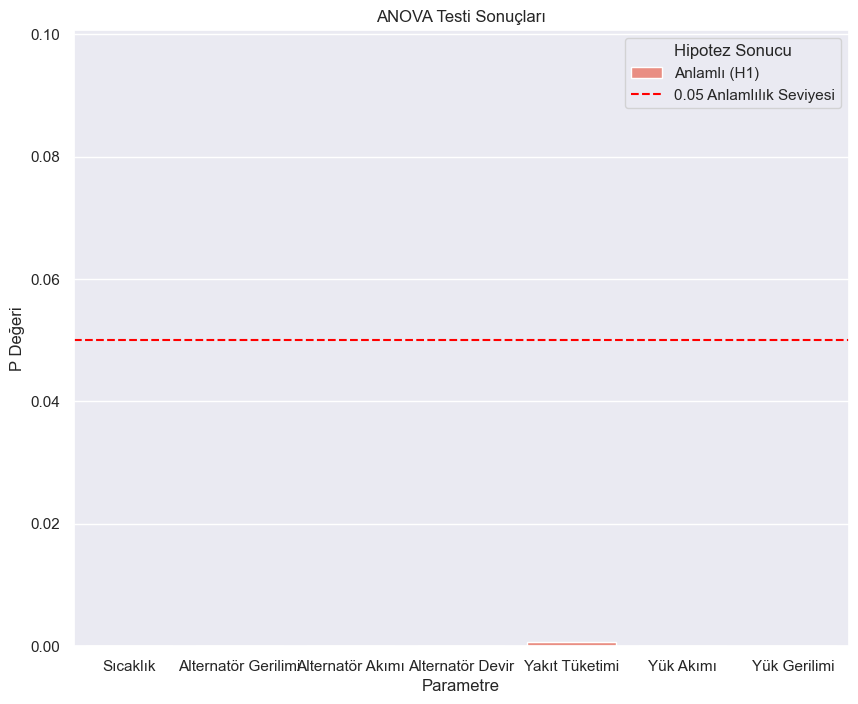

In [71]:
sns.set(style='darkgrid')

anlamlilik_siniri = 0.05

anova_results_df['Hipotez Rengi'] = anova_results_df['p Değeri'].apply(lambda p: 'Anlamlı (H1)' if p < anlamlilik_siniri else 'Anlamlı Değil (H0)')

plt.figure(figsize=(10, 8))

sns.barplot(data=anova_results_df, x='Parametre', y='p Değeri', hue='Hipotez Rengi', dodge=False, palette={"Anlamlı (H1)": "salmon", "Anlamlı Değil (H0)": "skyblue"})

plt.axhline(y=anlamlilik_siniri, color='red', linestyle='--', label="0.05 Anlamlılık Seviyesi")

plt.title('ANOVA Testi Sonuçları')
plt.xlabel('Parametre')
plt.ylabel('P Değeri')
plt.legend(title='Hipotez Sonucu')
plt.ylim(0, max(anova_results_df['p Değeri']) + 0.1)  # p değeri sınırının üstünde biraz boşluk bırak

# Grafik gösterimi
plt.show()


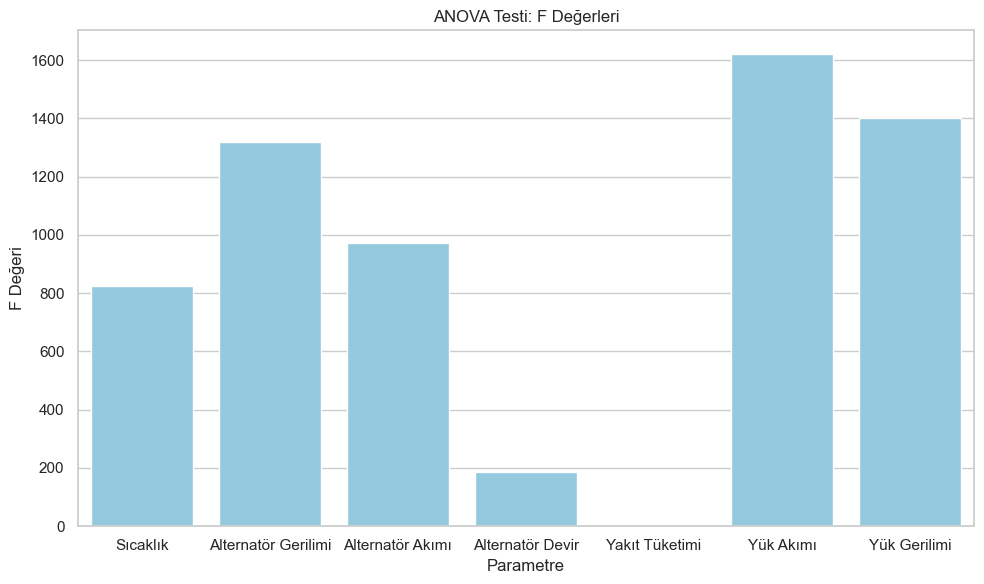

In [72]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(data=anova_results_df, x='Parametre', y='F Değeri', color='skyblue')


plt.title('ANOVA Testi: F Değerleri')
plt.xlabel('Parametre')
plt.ylabel('F Değeri')


plt.tight_layout()
plt.show()


### Makine öğrenmesi

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def algo_test(x, y):
    algos = [
        LinearRegression(), Ridge(), Lasso(), ElasticNet(), ExtraTreeRegressor(),
        GradientBoostingRegressor(), KNeighborsRegressor(), AdaBoostRegressor(),
        DecisionTreeRegressor(), XGBRegressor(), SVR(), MLPRegressor()
    ]
    algo_names = [
        'Linear', 'Ridge', 'Lasso', 'ElasticNet', 'Extra Tree', 'Gradient Boosting',
        'KNeighborsRegressor', 'AdaBoost', 'Decision Tree', 'XGBRegressor', 'SVR', 'MLP'
    ]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)
    
    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p)**.5)
        mae.append(mean_absolute_error(y_test, p))
    
    result['R_Squared'] = r_squared
    result['RMSE'] = rmse
    result['MAE'] = mae

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    result['R_Squared'].plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_ylim(result['R_Squared'].min() - 0.1, result['R_Squared'].max() + 0.1)
    axes[0].set_title('R-Squared Scores')
    axes[0].set_xlabel('Algoritmalar')
    axes[0].set_ylabel('R-Squared')
    axes[0].tick_params(rotation=45)

    result['RMSE'].plot(kind='bar', ax=axes[1], color='salmon')
    axes[1].set_ylim(0, result['RMSE'].max() + 0.1)
    axes[1].set_title('Root Mean Squared Error (RMSE)')
    axes[1].set_xlabel('Algoritmalar')
    axes[1].set_ylabel('RMSE')
    axes[1].tick_params(rotation=45)

    result['MAE'].plot(kind='bar', ax=axes[2], color='lightgreen')
    axes[2].set_ylim(0, result['MAE'].max() + 0.1)
    axes[2].set_title('Mean Absolute Error (MAE)')
    axes[2].set_xlabel('Algoritmalar')
    axes[2].set_ylabel('MAE')
    axes[2].tick_params(rotation=45)

    plt.tight_layout()
    plt.show()
    
    rtable = result.sort_values('R_Squared', ascending=False)
    return rtable


#### Yüklü

In [77]:
x_al_akım = df_yuklu.drop(['Alternatör Akımı', 'Condition'], axis=1)
y_al_akım = df_yuklu['Alternatör Akımı']

x_al_gerilimi = df_yuklu.drop(['Alternatör Gerilimi', 'Condition'], axis=1)
y_al_gerilimi = df_yuklu['Alternatör Gerilimi']

x_sıcaklık = df_yuklu.drop(['Sıcaklık', 'Condition'], axis=1)
y_sıcaklık = df_yuklu['Sıcaklık']

Yüklü için Sıcaklık


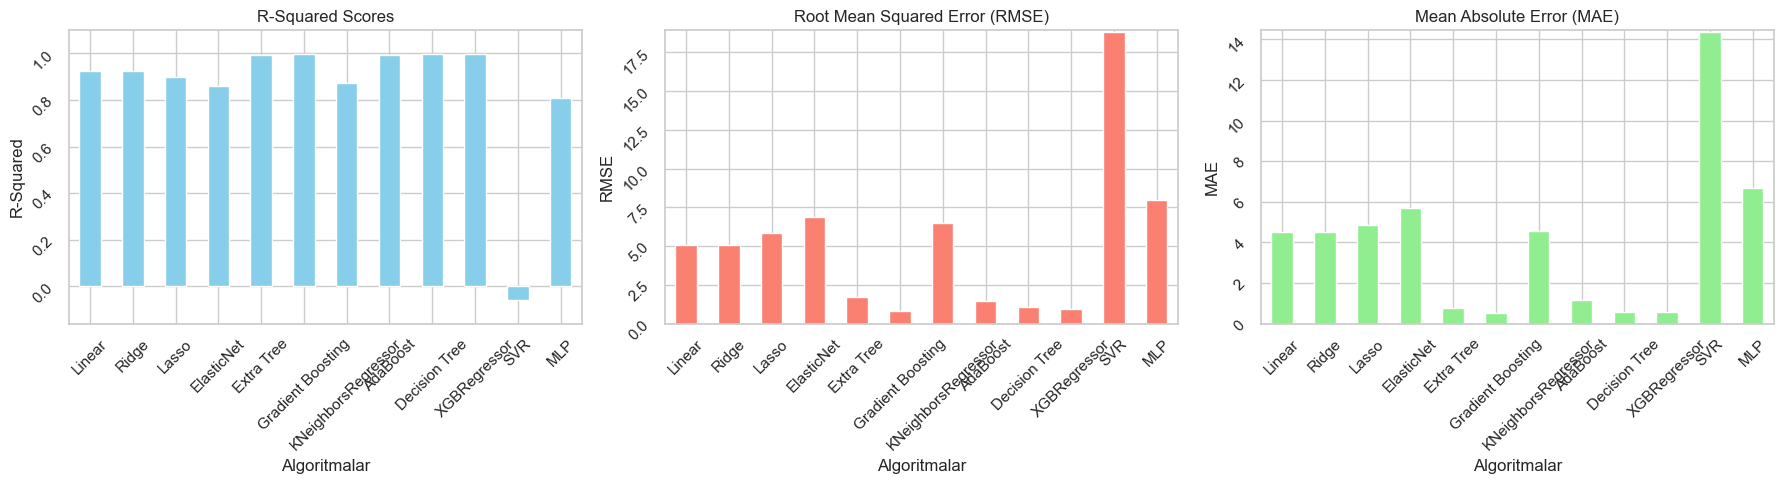

Yüklü için Gerilim


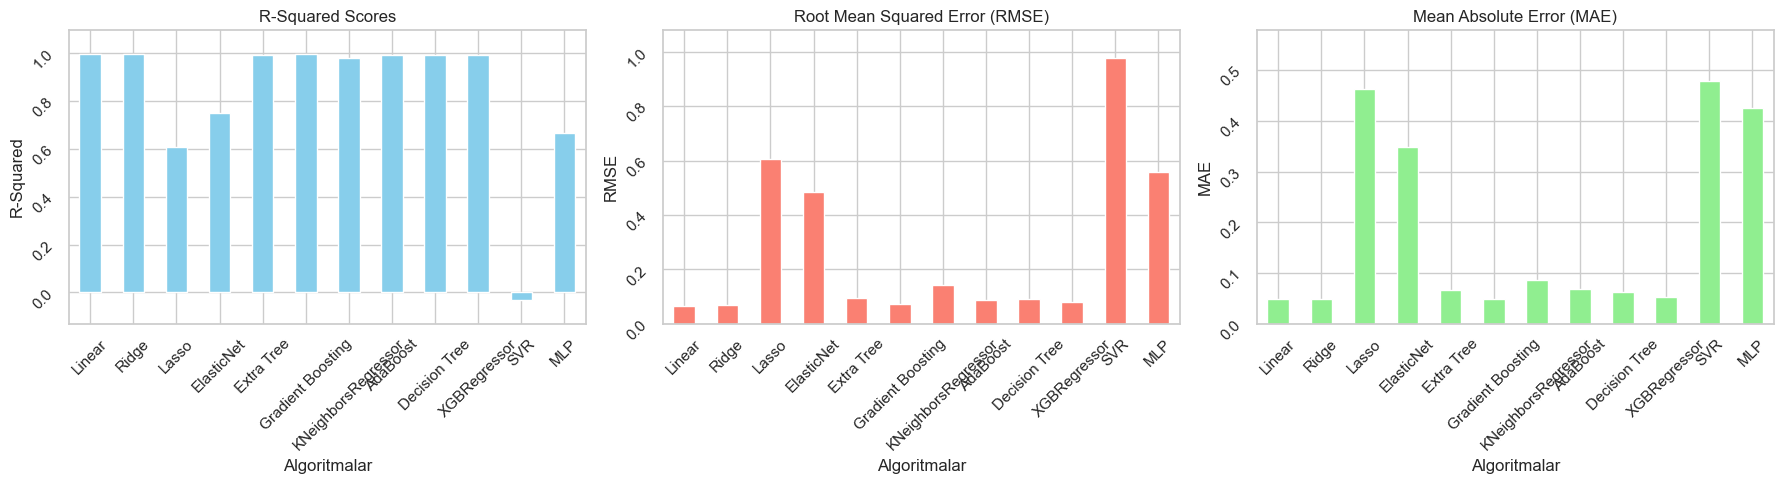

Yüklü için Akım


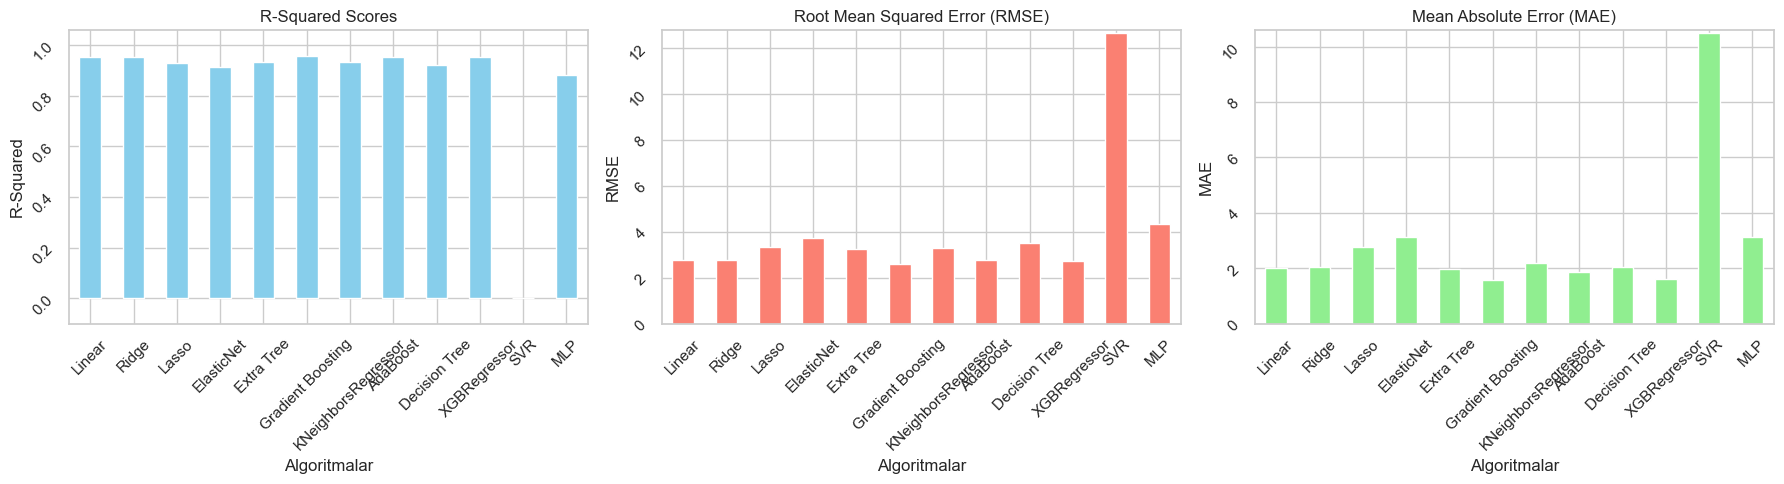

,R_Squared,RMSE,MAE
Gradient Boosting,0.958368,2.584225,1.586296
XGBRegressor,0.954269,2.708440,1.630047
Linear,0.952423,2.762569,2.008225
Ridge,0.952369,2.764130,2.059390
AdaBoost,0.952124,2.771251,1.869503
Extra Tree,0.934148,3.250115,1.958352
KNeighborsRegressor,0.931916,3.304745,2.174504
Lasso,0.929679,3.358586,2.785595
Decision Tree,0.923120,3.511729,2.033971
ElasticNet,0.913468,3.725669,3.143653


In [78]:
print("Yüklü için Sıcaklık")
algo_test(x_sıcaklık,y_sıcaklık)
print("Yüklü için Gerilim")
algo_test(x_al_gerilimi,y_al_gerilimi)
print("Yüklü için Akım")
algo_test(x_al_akım,y_al_akım)

#### Yüksüz

In [79]:
df_yuksuz.replace("#DEĞER!", np.nan, inplace=True)

df_yuksuz.fillna(0, inplace=True)

In [80]:
x_al_akım = df_yuksuz.drop(['Alternatör Akımı', 'Condition'], axis=1)
y_al_akım = df_yuksuz['Alternatör Akımı']

x_al_gerilimi = df_yuksuz.drop(['Alternatör Gerilimi', 'Condition'], axis=1)
y_al_gerilimi = df_yuksuz['Alternatör Gerilimi']

x_sıcaklık = df_yuksuz.drop(['Sıcaklık', 'Condition'], axis=1)
y_sıcaklık = df_yuksuz['Sıcaklık']

Yüksüz için Sıcaklık


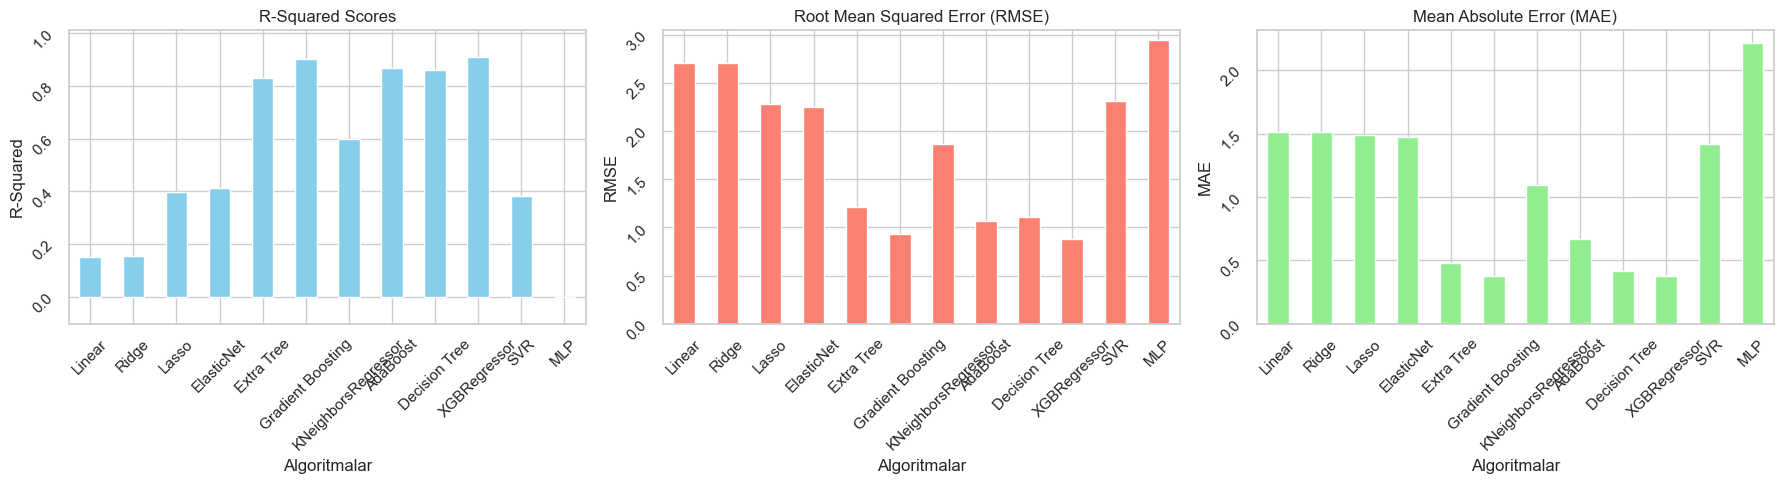

Yüksüz için Gerilim


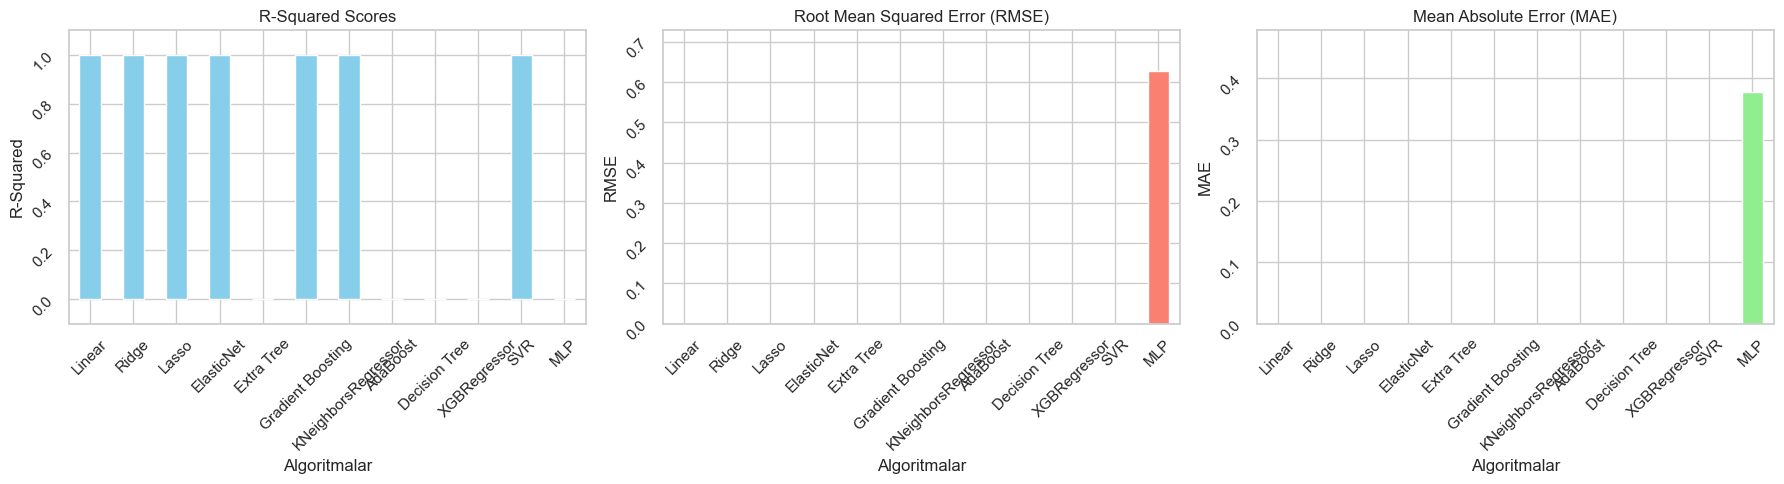

Yüksüz için Akım


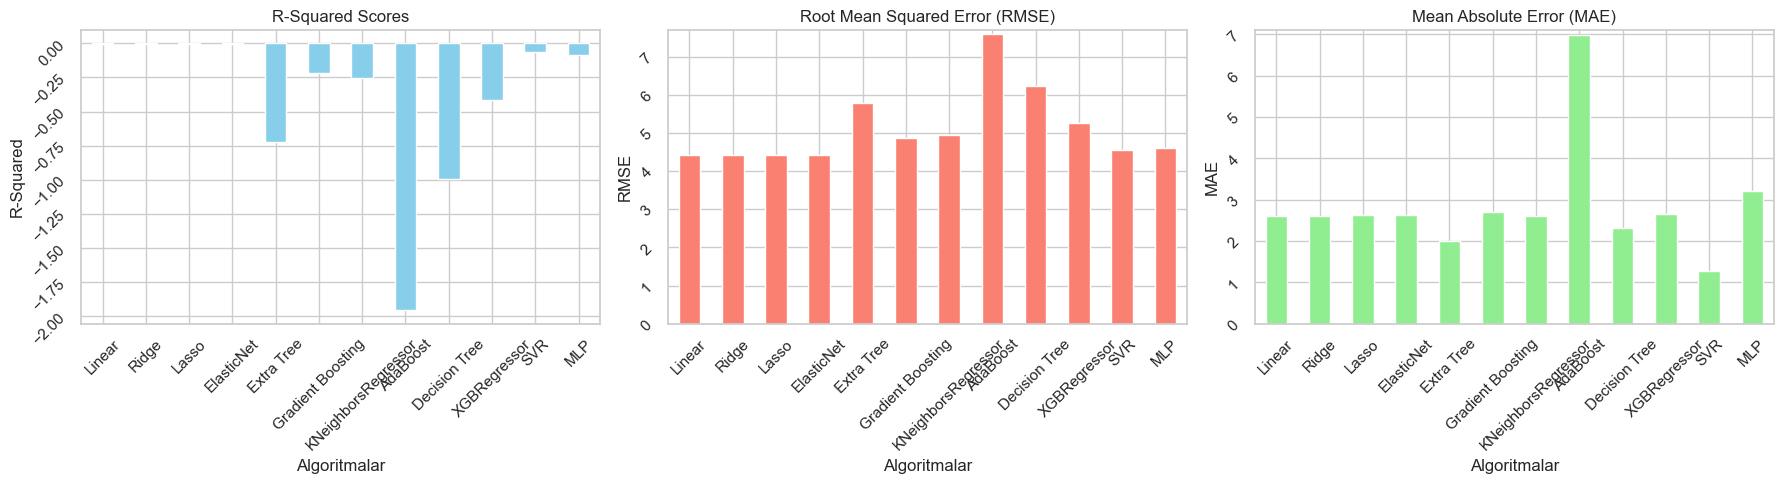

,R_Squared,RMSE,MAE
Ridge,-0.005190,4.423992,2.611766
Linear,-0.005362,4.424371,2.611644
Lasso,-0.007231,4.428482,2.625873
ElasticNet,-0.007232,4.428483,2.625867
SVR,-0.060997,4.545142,1.275358
MLP,-0.087975,4.602563,3.198476
Gradient Boosting,-0.219780,4.873390,2.708250
KNeighborsRegressor,-0.252544,4.938407,2.596962
XGBRegressor,-0.415994,5.250747,2.660731
Extra Tree,-0.719587,5.786320,1.991989


In [81]:
print("Yüksüz için Sıcaklık")
algo_test(x_sıcaklık,y_sıcaklık)
print("Yüksüz için Gerilim")
algo_test(x_al_gerilimi,y_al_gerilimi)
print("Yüksüz için Akım")
algo_test(x_al_akım,y_al_akım)

#### Akü Şarj

In [51]:
x_al_akım = df_aku.drop(['Alternatör Akımı', 'Condition'], axis=1)
y_al_akım = df_aku['Alternatör Akımı']

x_al_gerilimi = df_aku.drop(['Alternatör Gerilimi', 'Condition'], axis=1)
y_al_gerilimi = df_aku['Alternatör Gerilimi']

x_sıcaklık = df_aku.drop(['Sıcaklık', 'Condition'], axis=1)
y_sıcaklık = df_aku['Sıcaklık']

Akü Şarj için Sıcaklık


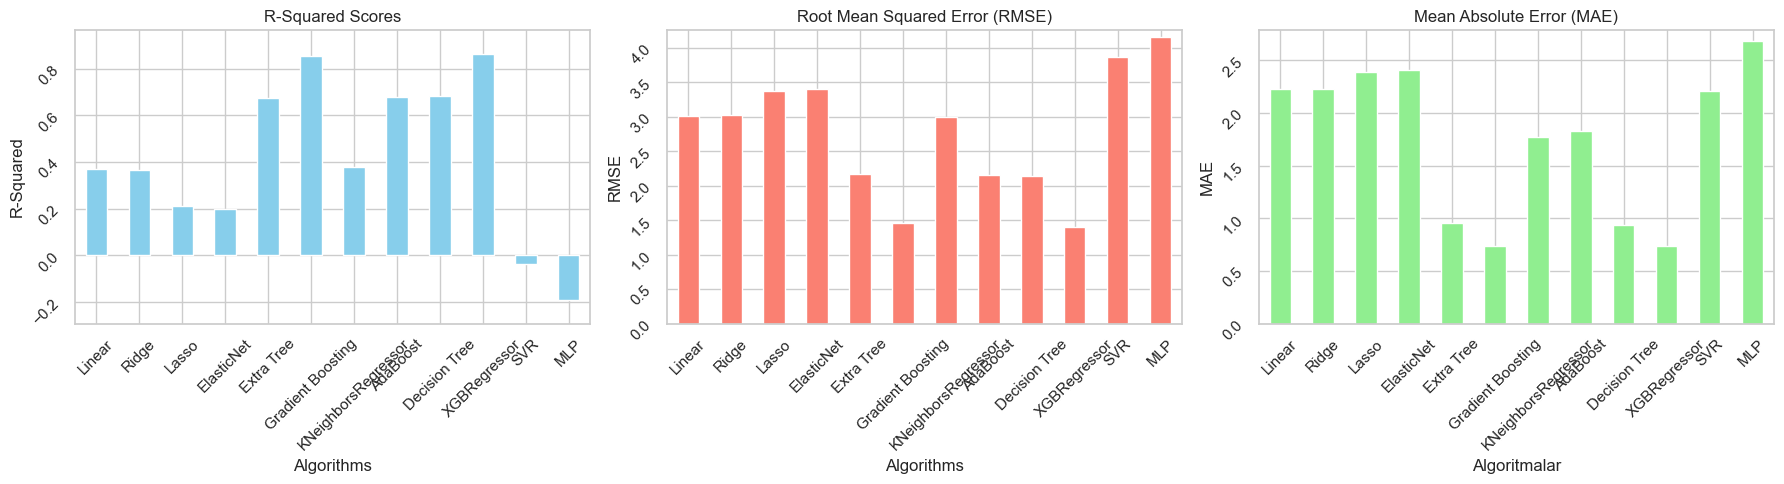

Akü Şarj için Gerilim


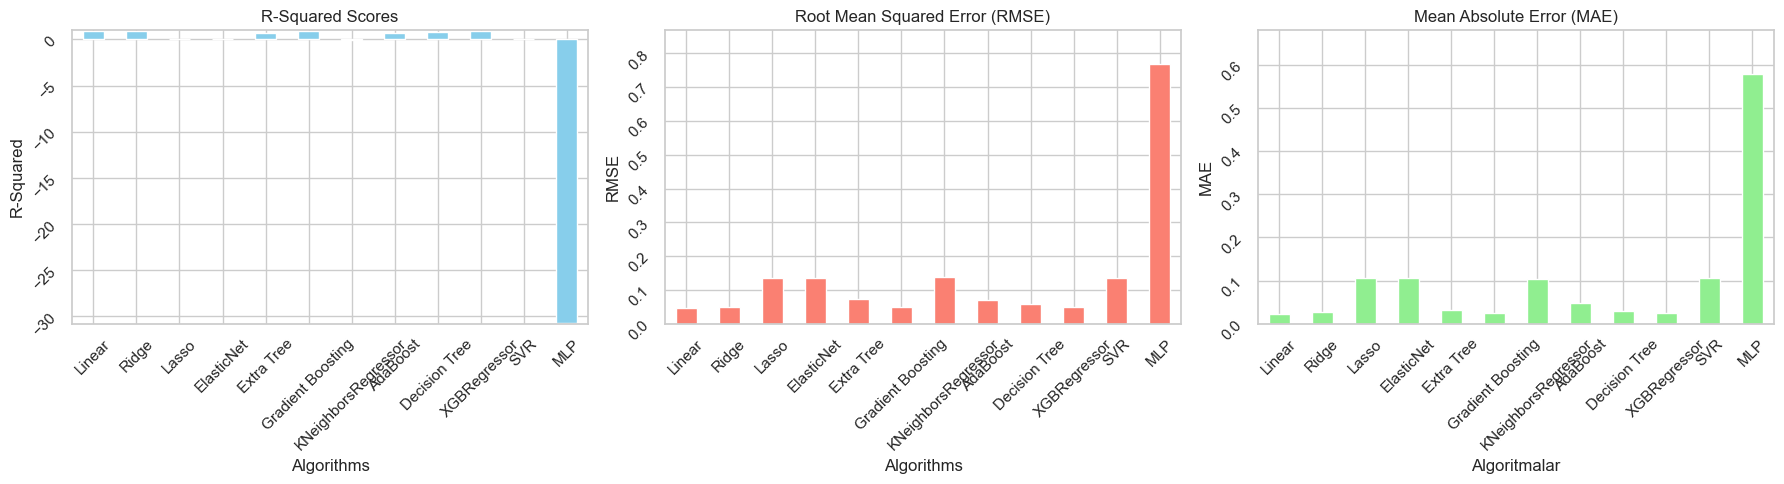

AKü Şarj için Akım


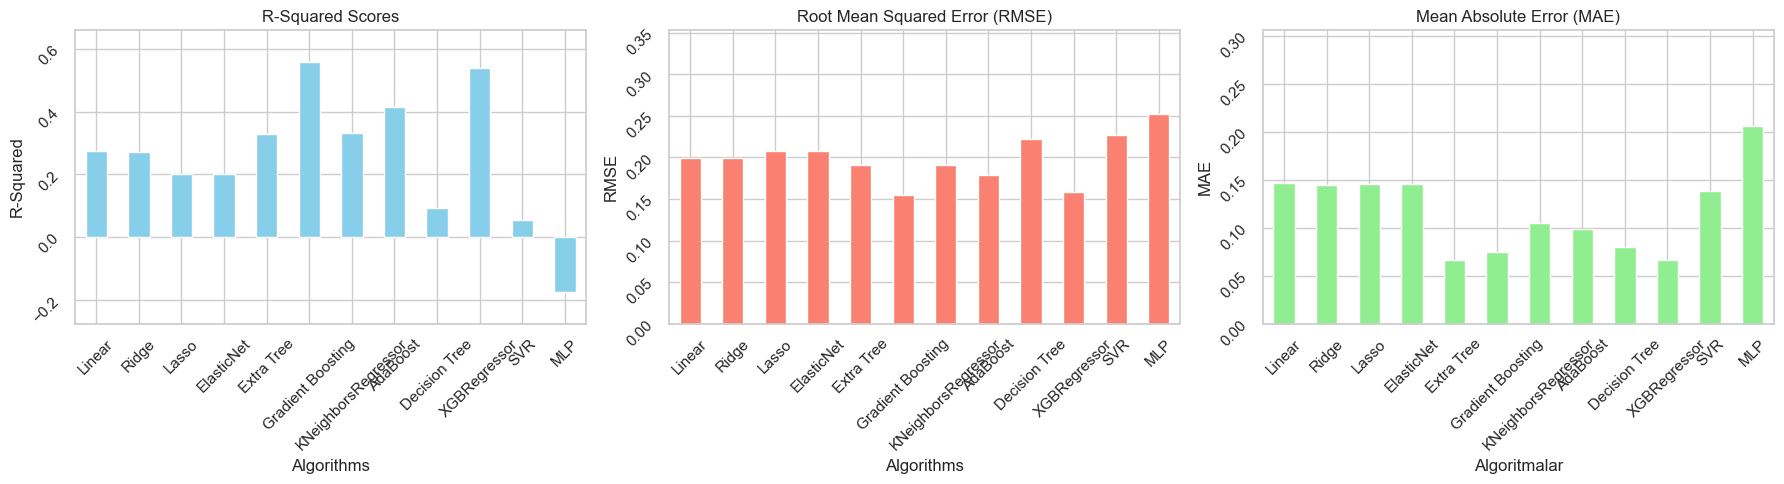

,R_Squared,RMSE,MAE
Gradient Boosting,0.558765,0.154902,0.074477
XGBRegressor,0.537465,0.158597,0.066681
AdaBoost,0.415246,0.178323,0.099137
KNeighborsRegressor,0.332591,0.190510,0.105097
Extra Tree,0.329482,0.190953,0.065856
Linear,0.273433,0.198774,0.146234
Ridge,0.271642,0.199019,0.145016
ElasticNet,0.202623,0.208235,0.145886
Lasso,0.202443,0.208258,0.145932
Decision Tree,0.093113,0.222074,0.079767


In [52]:
print("Akü Şarj için Sıcaklık")
algo_test(x_sıcaklık,y_sıcaklık)
print("Akü Şarj için Gerilim")
algo_test(x_al_gerilimi,y_al_gerilimi)
print("AKü Şarj için Akım")
algo_test(x_al_akım,y_al_akım)

#### Girdi Değişkenlerinin Çıktı Değişkenlerine Etkisi

#### Yüklü

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import warnings

warnings.filterwarnings("ignore")

file_path = 'excelData.xlsx' 
sheets = ['yuklu', 'yuksuz', 'akuSarj']

output_columns = ['Alternatör Akımı', 'Alternatör Gerilimi', 'Sıcaklık']

for sheet in sheets:
    df = pd.read_excel(file_path, sheet_name=sheet)
    
    df.replace('#DEĞER!', np.nan, inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    print(f"\n\n### Sayfa: {sheet} ###")

    for output_column in output_columns:
        X = df.drop(columns=[output_column])
        y = df[output_column]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        print(f"\nÇıktı Değişkeni: {output_column}")

        dt_regressor = DecisionTreeRegressor(random_state=42)
        dt_regressor.fit(X_train, y_train)
        print("Decision Tree Feature Importances:", dt_regressor.feature_importances_)

        rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_regressor.fit(X_train, y_train)
        print("Mean Decrease Impurity (MDI) Feature Importances:", rf_regressor.feature_importances_)

        lr = LinearRegression()
        lr.fit(X_train, y_train)
        print("Linear Regression Coefficients:", lr.coef_)

        rf_boruta = RandomForestRegressor(n_jobs=-1, max_depth=5, random_state=42)
        boruta = BorutaPy(rf_boruta, n_estimators='auto', random_state=42)
        boruta.fit(X_train.values, y_train.values)
        print("Boruta Algorithm Selected Features:", X.columns[boruta.support_].tolist())




### Sayfa: yuklu ###

Çıktı Değişkeni: Alternatör Akımı
Decision Tree Feature Importances: [0.00639457 0.01699974 0.00377474 0.70660204 0.03237684 0.23385207]
Mean Decrease Impurity (MDI) Feature Importances: [0.02473017 0.0426899  0.00357179 0.29001851 0.26655098 0.37243864]
Linear Regression Coefficients: [-5.95037425e-02  2.51363988e+01 -8.73816720e-03 -2.00422550e+00
  7.66880915e-01 -2.98421222e+01]
Boruta Algorithm Selected Features: ['Sıcaklık', 'Alternatör Gerilimi', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']

Çıktı Değişkeni: Alternatör Gerilimi
Decision Tree Feature Importances: [1.19706286e-03 1.43243019e-03 1.80359709e-03 4.06386196e-03
 4.11037505e-04 9.91092010e-01]
Mean Decrease Impurity (MDI) Feature Importances: [7.95793122e-02 2.03057981e-02 1.37340108e-03 3.39599825e-03
 4.74515274e-04 8.94870975e-01]
Linear Regression Coefficients: [-2.59006218e-04  1.04006500e-02  3.23640992e-05  6.67841375e-03
 -3.61341578e-03  1.01109670e+00]
Boruta Algorithm Selected Featu

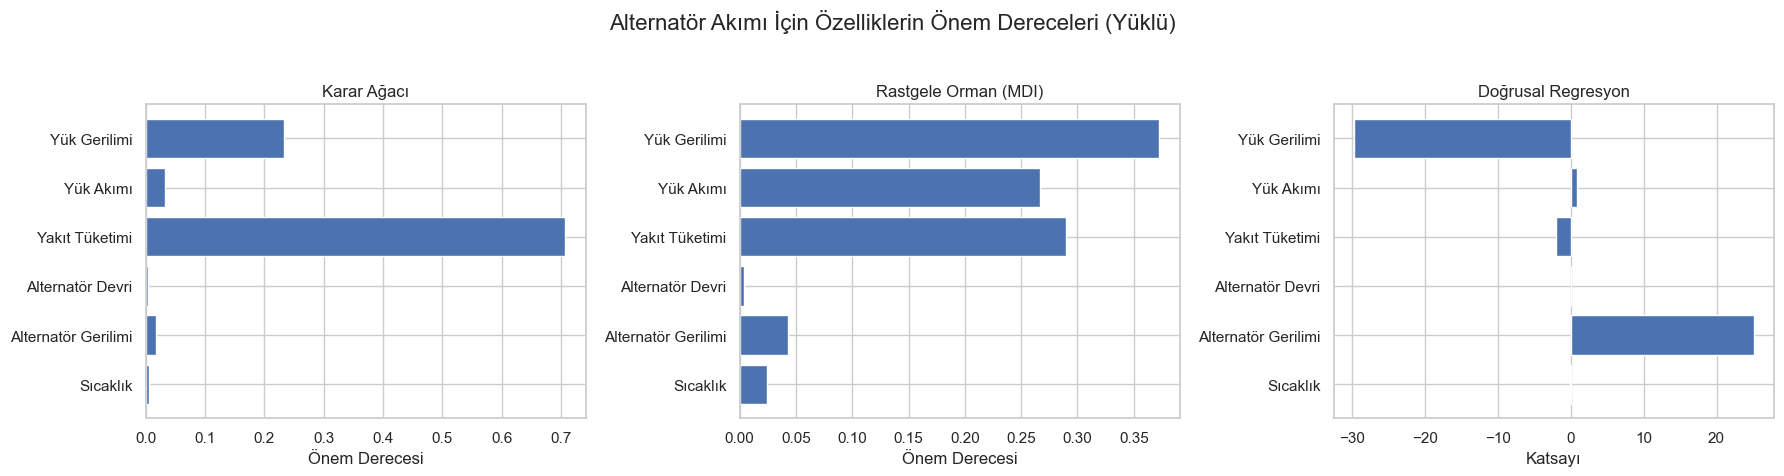

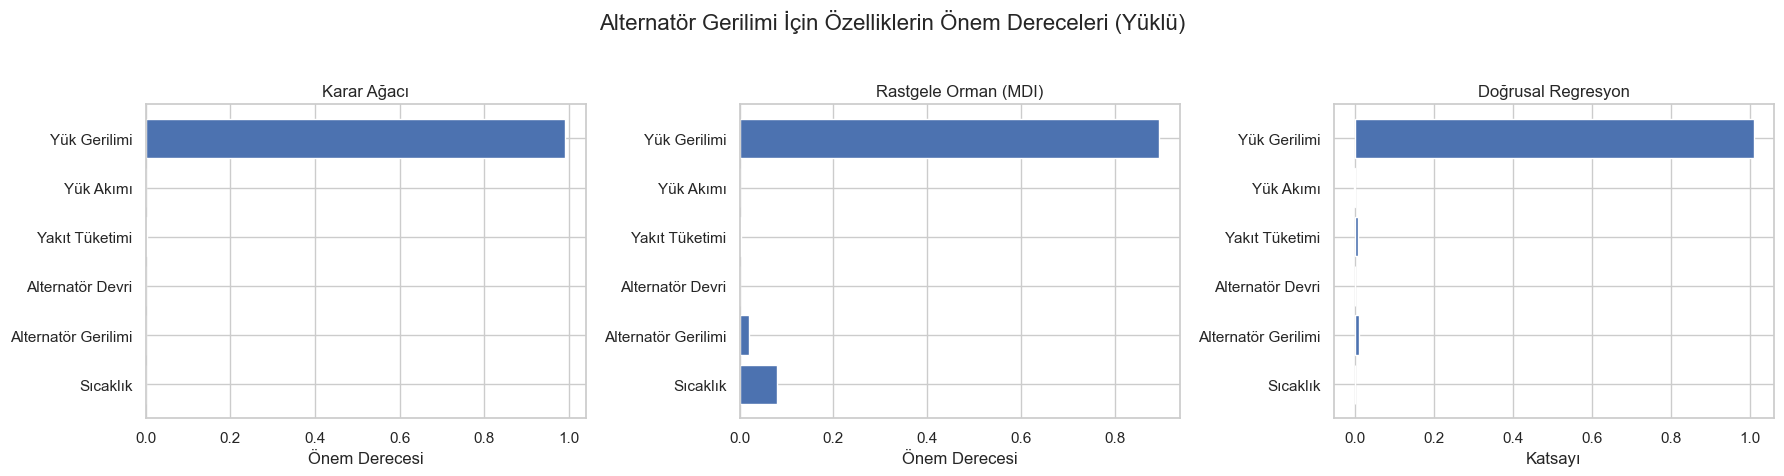

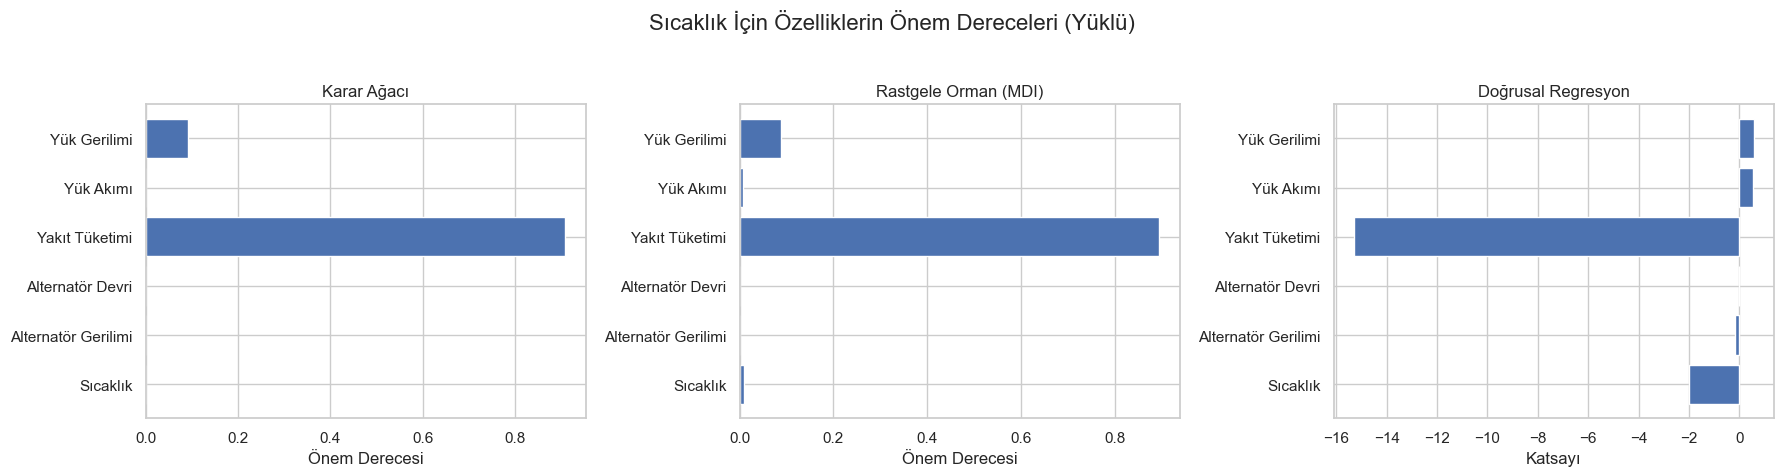

In [54]:
import matplotlib.pyplot as plt

dt_importances_yuklu_akim = [0.00639457, 0.01699974, 0.00377474, 0.70660204, 0.03237684, 0.23385207]
rf_importances_yuklu_akim = [0.02473017, 0.0426899, 0.00357179, 0.29001851, 0.26655098, 0.37243864]
lr_coefficients_yuklu_akim = [-5.95037425e-02, 2.51363988e+01, -8.73816720e-03, -2.00422550e+00, 7.66880915e-01, -2.98421222e+01]
boruta_features_yuklu_akim = ['Sıcaklık', 'Alternatör Gerilimi', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']

features = ['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Devri', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Alternatör Akımı İçin Özelliklerin Önem Dereceleri (Yüklü)", fontsize=16)

axes[0].barh(features, dt_importances_yuklu_akim)
axes[0].set_title("Karar Ağacı")
axes[0].set_xlabel("Önem Derecesi")

axes[1].barh(features, rf_importances_yuklu_akim)
axes[1].set_title("Rastgele Orman (MDI)")
axes[1].set_xlabel("Önem Derecesi")

axes[2].barh(features, lr_coefficients_yuklu_akim)
axes[2].set_title("Doğrusal Regresyon")
axes[2].set_xlabel("Katsayı")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

dt_importances_yuklu_gerilim = [1.19706286e-03, 1.43243019e-03, 1.80359709e-03, 4.06386196e-03, 4.11037505e-04, 9.91092010e-01]
rf_importances_yuklu_gerilim = [7.95793122e-02, 2.03057981e-02, 1.37340108e-03, 3.39599825e-03, 4.74515274e-04, 8.94870975e-01]
lr_coefficients_yuklu_gerilim = [-2.59006218e-04, 1.04006500e-02, 3.23640992e-05, 6.67841375e-03, -3.61341578e-03, 1.01109670e+00]
boruta_features_yuklu_gerilim = ['Sıcaklık', 'Alternatör Akımı', 'Alternatör Devri', 'Yakıt Tüketimi', 'Yük Gerilimi']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Alternatör Gerilimi İçin Özelliklerin Önem Dereceleri (Yüklü)", fontsize=16)

axes[0].barh(features, dt_importances_yuklu_gerilim)
axes[0].set_title("Karar Ağacı")
axes[0].set_xlabel("Önem Derecesi")

axes[1].barh(features, rf_importances_yuklu_gerilim)
axes[1].set_title("Rastgele Orman (MDI)")
axes[1].set_xlabel("Önem Derecesi")

axes[2].barh(features, lr_coefficients_yuklu_gerilim)
axes[2].set_title("Doğrusal Regresyon")
axes[2].set_xlabel("Katsayı")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

dt_importances_yuklu_sicaklik = [5.81265763e-05, 1.40943357e-04, 2.95203509e-04, 9.07413239e-01, 3.00192551e-04, 9.17922953e-02]
rf_importances_yuklu_sicaklik = [9.84508049e-03, 1.44755985e-04, 2.94997041e-04, 8.94195519e-01, 7.76955114e-03, 8.77500966e-02]
lr_coefficients_yuklu_sicaklik = [-1.99390626e+00, -1.89537982e-01, -1.29611866e-02, -1.53134605e+01, 5.55926766e-01, 5.80331726e-01]
boruta_features_yuklu_sicaklik = ['Alternatör Gerilimi', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Sıcaklık İçin Özelliklerin Önem Dereceleri (Yüklü)", fontsize=16)

axes[0].barh(features, dt_importances_yuklu_sicaklik)
axes[0].set_title("Karar Ağacı")
axes[0].set_xlabel("Önem Derecesi")

axes[1].barh(features, rf_importances_yuklu_sicaklik)
axes[1].set_title("Rastgele Orman (MDI)")
axes[1].set_xlabel("Önem Derecesi")

axes[2].barh(features, lr_coefficients_yuklu_sicaklik)
axes[2].set_title("Doğrusal Regresyon")
axes[2].set_xlabel("Katsayı")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Yüksüz

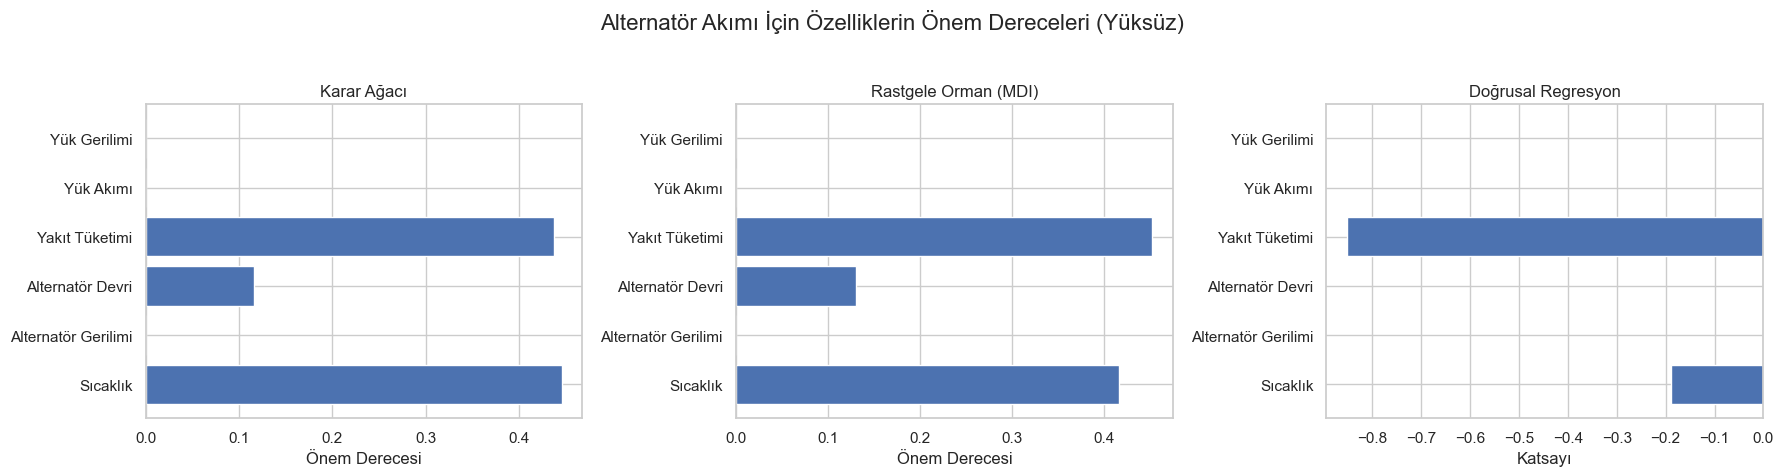

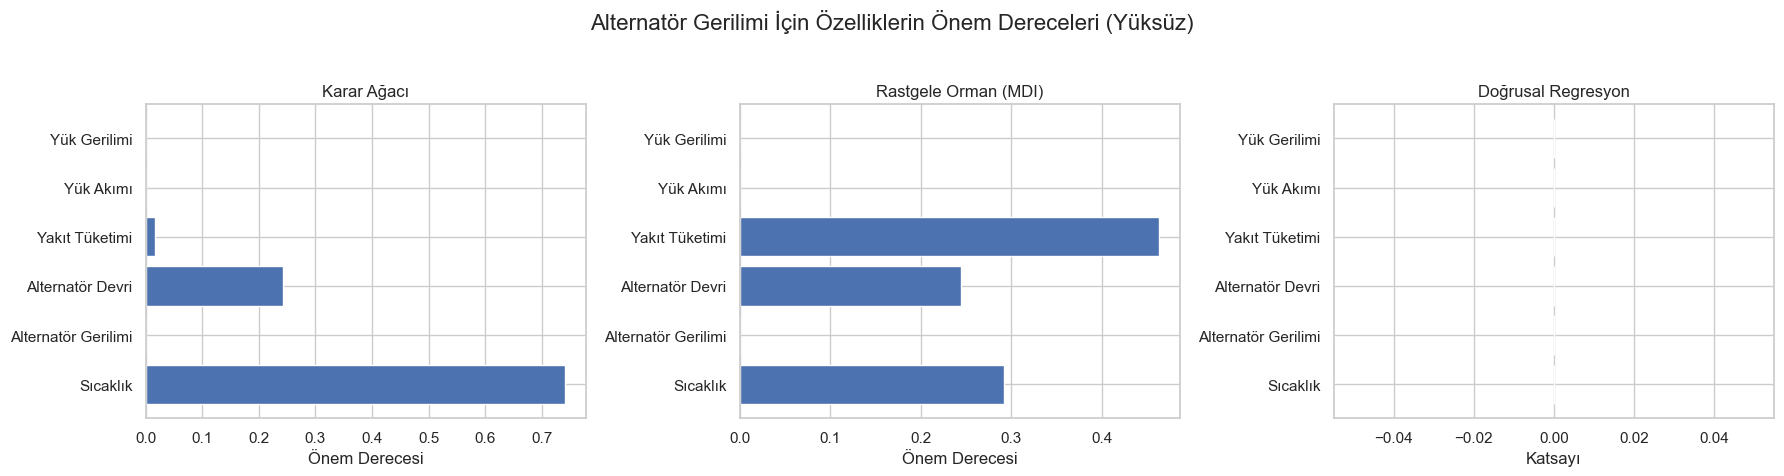

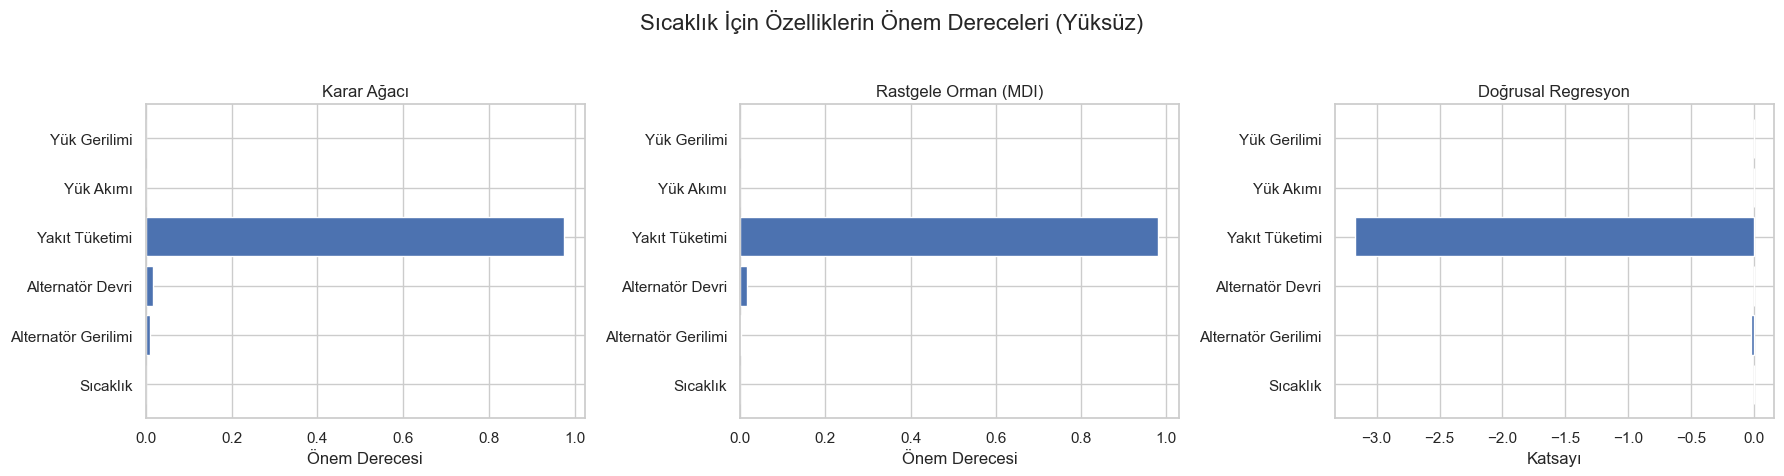

In [55]:

dt_importances_yuksuz_akim = [0.44582265, 0.0, 0.1166121, 0.43756525, 0.0, 0.0]
rf_importances_yuksuz_akim = [0.4168031, 0.0, 0.13091272, 0.45228418, 0.0, 0.0]
lr_coefficients_yuksuz_akim = [-1.89266488e-01, 1.24932616e-15, -9.22881108e-05, -8.51374851e-01, 0.0, 0.0]
boruta_features_yuksuz_akim = []

features_yuksuz = ['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Devri', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Alternatör Akımı İçin Özelliklerin Önem Dereceleri (Yüksüz)", fontsize=16)

axes[0].barh(features_yuksuz, dt_importances_yuksuz_akim)
axes[0].set_title("Karar Ağacı")
axes[0].set_xlabel("Önem Derecesi")

axes[1].barh(features_yuksuz, rf_importances_yuksuz_akim)
axes[1].set_title("Rastgele Orman (MDI)")
axes[1].set_xlabel("Önem Derecesi")

axes[2].barh(features_yuksuz, lr_coefficients_yuksuz_akim)
axes[2].set_title("Doğrusal Regresyon")
axes[2].set_xlabel("Katsayı")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

dt_importances_yuksuz_gerilim = [0.74126984, 0.0, 0.24285714, 0.01587302, 0.0, 0.0]
rf_importances_yuksuz_gerilim = [0.29241252, 0.0, 0.24415786, 0.46342962, 0.0, 0.0]
lr_coefficients_yuksuz_gerilim = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
boruta_features_yuksuz_gerilim = []

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Alternatör Gerilimi İçin Özelliklerin Önem Dereceleri (Yüksüz)", fontsize=16)

axes[0].barh(features_yuksuz, dt_importances_yuksuz_gerilim)
axes[0].set_title("Karar Ağacı")
axes[0].set_xlabel("Önem Derecesi")

axes[1].barh(features_yuksuz, rf_importances_yuksuz_gerilim)
axes[1].set_title("Rastgele Orman (MDI)")
axes[1].set_xlabel("Önem Derecesi")

axes[2].barh(features_yuksuz, lr_coefficients_yuksuz_gerilim)
axes[2].set_title("Doğrusal Regresyon")
axes[2].set_xlabel("Katsayı")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

dt_importances_yuksuz_sicaklik = [0.0, 0.00917589, 0.01773793, 0.97308617, 0.0, 0.0]
rf_importances_yuksuz_sicaklik = [0.0, 0.00225046, 0.01632911, 0.98142043, 0.0, 0.0]
lr_coefficients_yuksuz_sicaklik = [0.0, -2.09275413e-02, 2.31246266e-04, -3.17390176e+00, 0.0, 0.0]
boruta_features_yuksuz_sicaklik = ['Yakıt Tüketimi']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Sıcaklık İçin Özelliklerin Önem Dereceleri (Yüksüz)", fontsize=16)

axes[0].barh(features_yuksuz, dt_importances_yuksuz_sicaklik)
axes[0].set_title("Karar Ağacı")
axes[0].set_xlabel("Önem Derecesi")

axes[1].barh(features_yuksuz, rf_importances_yuksuz_sicaklik)
axes[1].set_title("Rastgele Orman (MDI)")
axes[1].set_xlabel("Önem Derecesi")

axes[2].barh(features_yuksuz, lr_coefficients_yuksuz_sicaklik)
axes[2].set_title("Doğrusal Regresyon")
axes[2].set_xlabel("Katsayı")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Akü Şarj

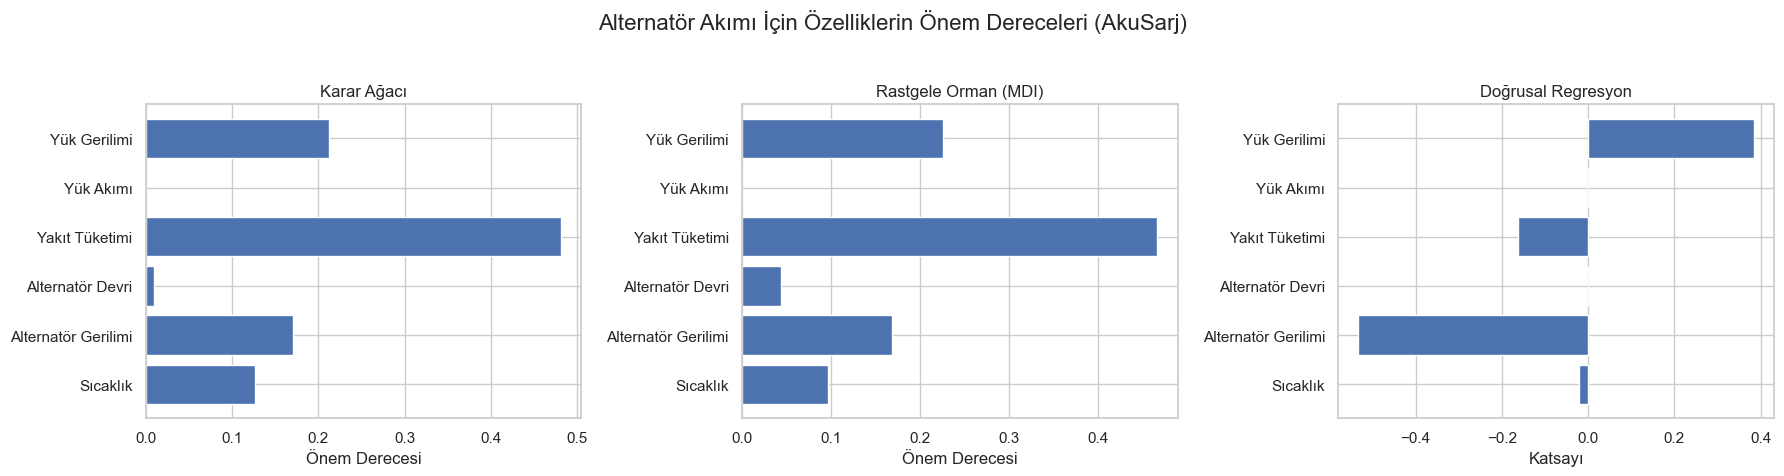

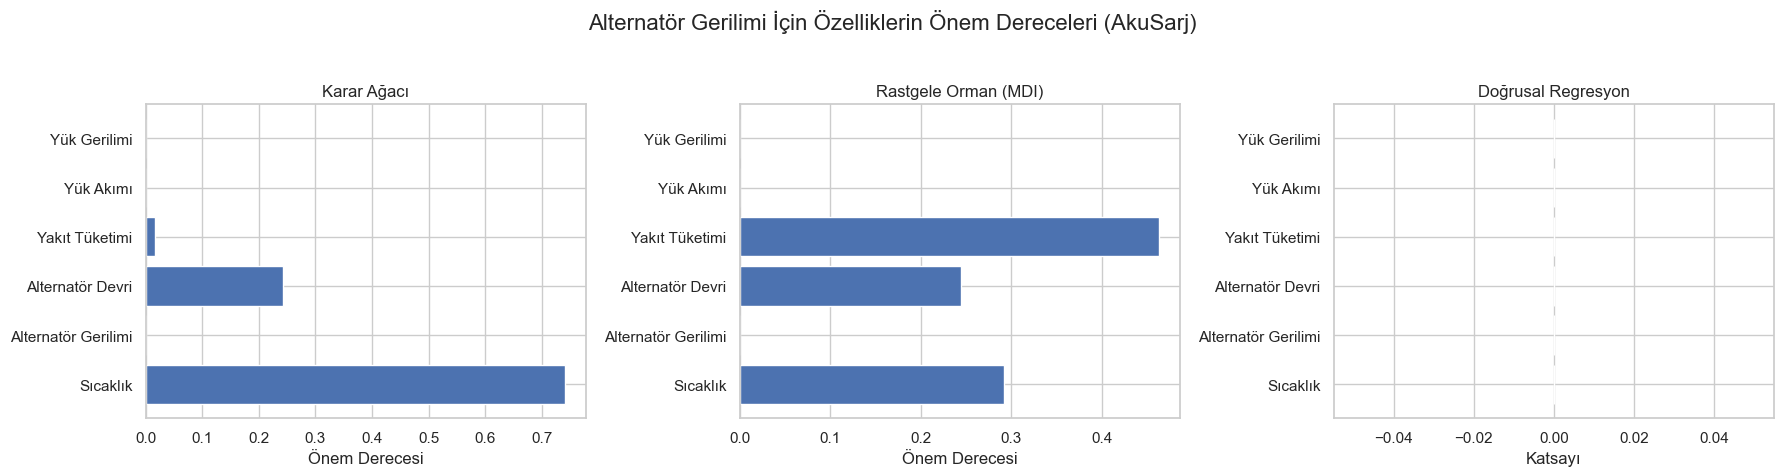

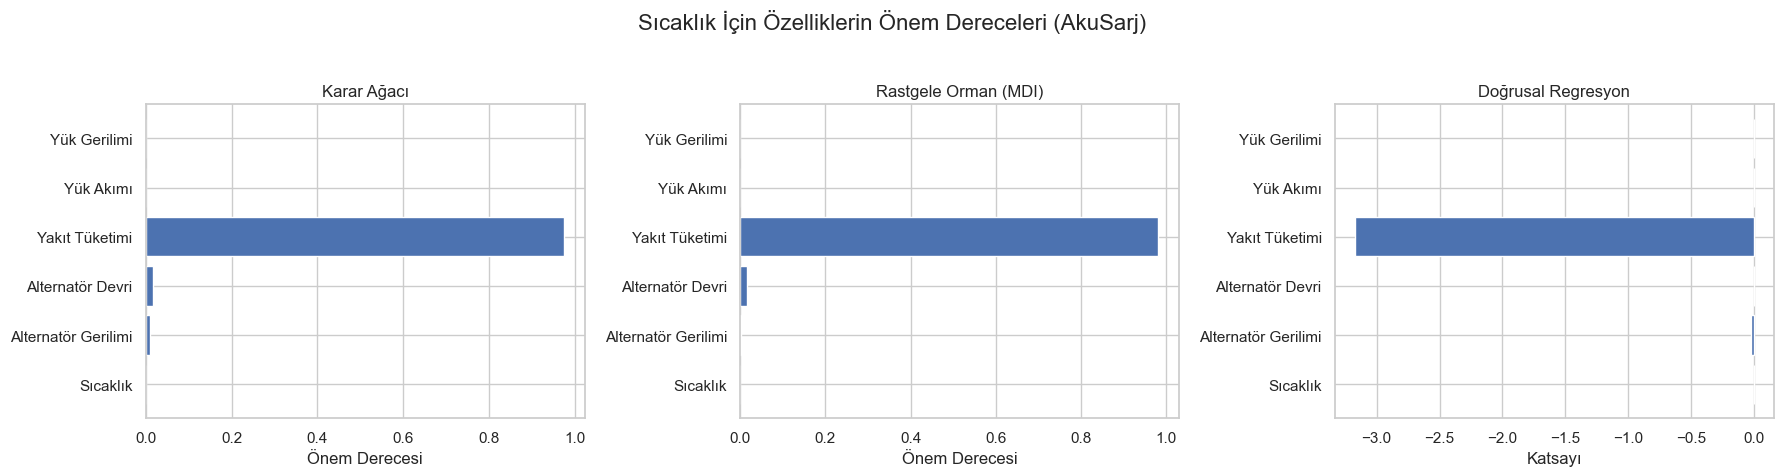

In [83]:

dt_importances_akusarj_akim = [0.12640115, 0.17100728, 0.00932063, 0.48041788, 0.0, 0.21285306]
rf_importances_akusarj_akim = [0.09646656, 0.16827332, 0.04353045, 0.46587967, 0.0, 0.22585001]
lr_coefficients_akusarj_akim = [-2.14385645e-02, -5.33410188e-01, -2.92023524e-06, -1.62311606e-01, -2.44586899e-14, 3.85207570e-01]
boruta_features_akusarj_akim = ['Sıcaklık', 'Alternatör Gerilimi', 'Yakıt Tüketimi', 'Yük Gerilimi']

features_akusarj = ['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Devri', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Alternatör Akımı İçin Özelliklerin Önem Dereceleri (AkuSarj)", fontsize=16)

axes[0].barh(features_akusarj, dt_importances_akusarj_akim)
axes[0].set_title("Karar Ağacı")
axes[0].set_xlabel("Önem Derecesi")

axes[1].barh(features_akusarj, rf_importances_akusarj_akim)
axes[1].set_title("Rastgele Orman (MDI)")
axes[1].set_xlabel("Önem Derecesi")

axes[2].barh(features_akusarj, lr_coefficients_akusarj_akim)
axes[2].set_title("Doğrusal Regresyon")
axes[2].set_xlabel("Katsayı")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

dt_importances_akusarj_gerilim = [0.74126984, 0.0, 0.24285714, 0.01587302, 0.0, 0.0]
rf_importances_akusarj_gerilim = [0.29241252, 0.0, 0.24415786, 0.46342962, 0.0, 0.0]
lr_coefficients_akusarj_gerilim = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
boruta_features_akusarj_gerilim = []

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Alternatör Gerilimi İçin Özelliklerin Önem Dereceleri (AkuSarj)", fontsize=16)

axes[0].barh(features_akusarj, dt_importances_akusarj_gerilim)
axes[0].set_title("Karar Ağacı")
axes[0].set_xlabel("Önem Derecesi")

axes[1].barh(features_akusarj, rf_importances_akusarj_gerilim)
axes[1].set_title("Rastgele Orman (MDI)")
axes[1].set_xlabel("Önem Derecesi")

axes[2].barh(features_akusarj, lr_coefficients_akusarj_gerilim)
axes[2].set_title("Doğrusal Regresyon")
axes[2].set_xlabel("Katsayı")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

dt_importances_akusarj_sicaklik = [0.0, 0.00917589, 0.01773793, 0.97308617, 0.0, 0.0]
rf_importances_akusarj_sicaklik = [0.0, 0.00225046, 0.01632911, 0.98142043, 0.0, 0.0]
lr_coefficients_akusarj_sicaklik = [0.0, -2.09275413e-02, 2.31246266e-04, -3.17390176e+00, 0.0, 0.0]
boruta_features_akusarj_sicaklik = ['Yakıt Tüketimi']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Sıcaklık İçin Özelliklerin Önem Dereceleri (AkuSarj)", fontsize=16)

axes[0].barh(features_akusarj, dt_importances_akusarj_sicaklik)
axes[0].set_title("Karar Ağacı")
axes[0].set_xlabel("Önem Derecesi")

axes[1].barh(features_akusarj, rf_importances_akusarj_sicaklik)
axes[1].set_title("Rastgele Orman (MDI)")
axes[1].set_xlabel("Önem Derecesi")

axes[2].barh(features_akusarj, lr_coefficients_akusarj_sicaklik)
axes[2].set_title("Doğrusal Regresyon")
axes[2].set_xlabel("Katsayı")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Clustering

##### K-means kümeleme

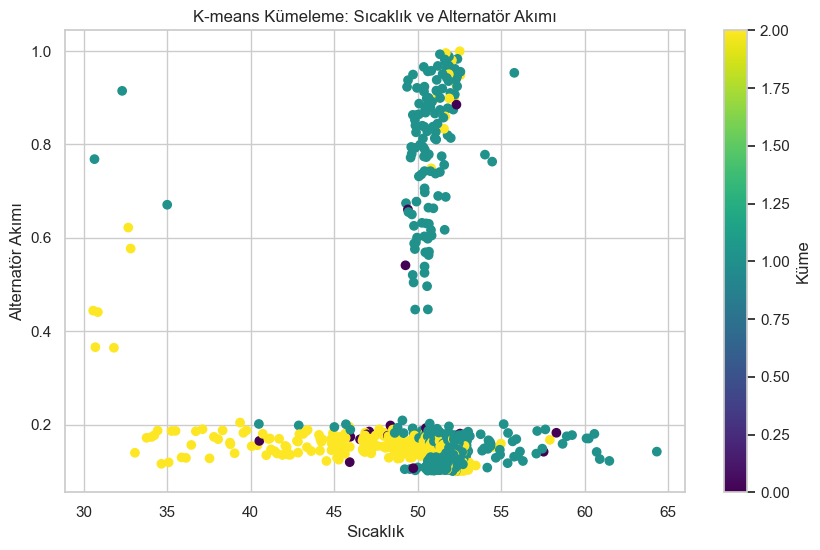

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = df[['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Akımı', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)  # 3 küme seçildi
data['Küme'] = kmeans.fit_predict(data_scaled)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(data['Sıcaklık'], data['Alternatör Akımı'], c=data['Küme'], cmap='viridis')
plt.title('K-means Kümeleme: Sıcaklık ve Alternatör Akımı')
plt.xlabel('Sıcaklık')
plt.ylabel('Alternatör Akımı')
plt.colorbar(label='Küme')
plt.show()


##### PCA ile kümeleme

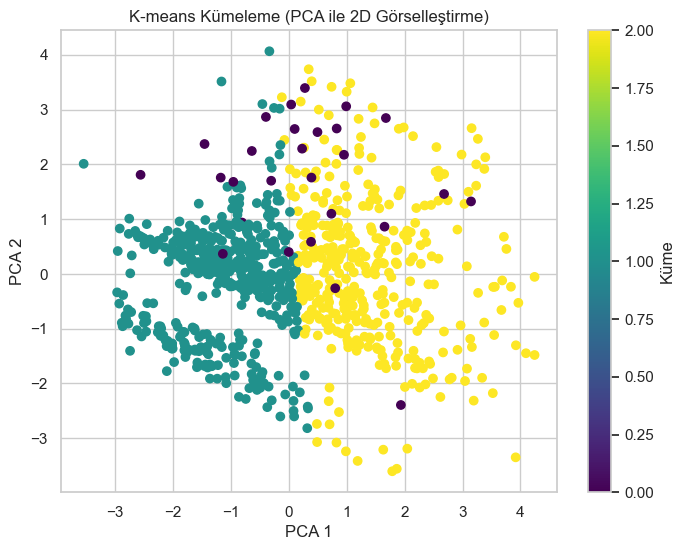

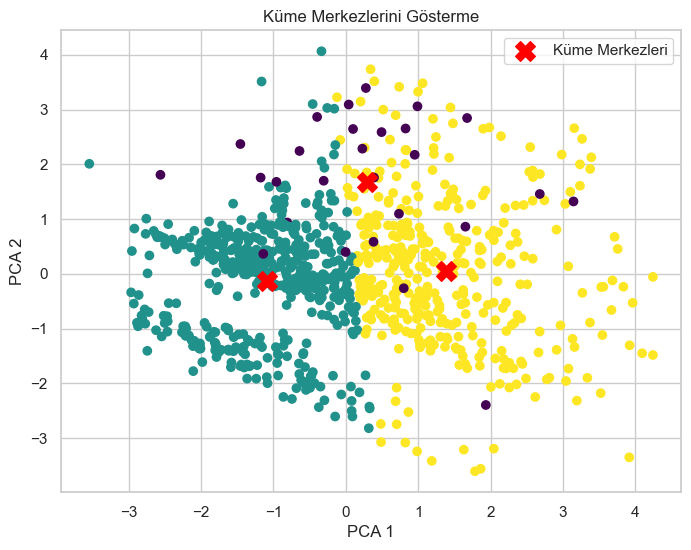

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = df[['Sıcaklık', 'Alternatör Gerilimi', 'Alternatör Akımı', 'Yakıt Tüketimi', 'Yük Akımı', 'Yük Gerilimi']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Küme'] = kmeans.fit_predict(data_scaled)

pca = PCA(n_components=2)  
pca_components = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Küme'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Kümeleme (PCA ile 2D Görselleştirme)')
plt.colorbar(label='Küme')
plt.show()

centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Küme'], cmap='viridis')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='red', marker='X', label='Küme Merkezleri')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Küme Merkezlerini Gösterme')
plt.legend()
plt.show()
